<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Parcial3-2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJ 1

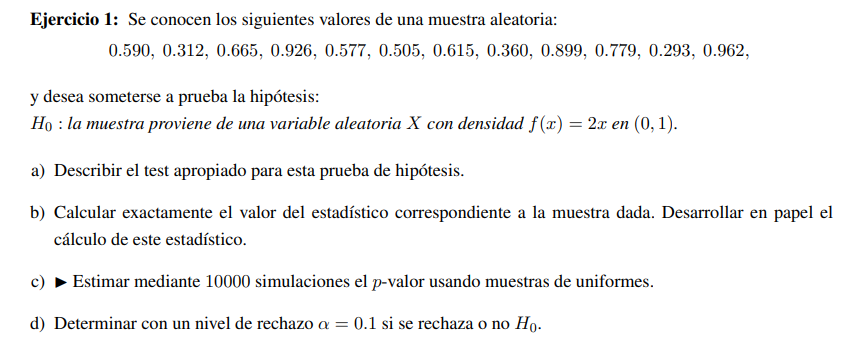

In [2]:
#@title b)
from random import random
import numpy as np

MUESTRA = [0.59, 0.312, 0.665, 0.925, 0.577, 0.505, 0.615, 0.36, 0.899, 0.779, 0.293, 0.962]

class DistEsperada:
    def fdp(self, x): return 2 * x  # x en (0, 1) es la f
    def fda(self, x): return x ** 2 # x en (0, 1) es la F
    def simular(self): return np.sqrt(random()) # usando transformada inv
    def muestrear(self, n): return [self.simular() for _ in range(n)]

def estadistico_ks(muestra_ordenada, F_h0):
    n = len(muestra_ordenada)

    max1 = max((j+1)/n - F_h0(y) for j, y in enumerate(muestra_ordenada))
    max2 = max(F_h0(y) - (j/n) for j, y in enumerate(muestra_ordenada))

    return max(max1, max2)

muestra_ordenada = np.sort(MUESTRA)
dist_esperada = DistEsperada()
d_0 = estadistico_ks(muestra_ordenada, dist_esperada.fda)
print(f"d_0: {d_0}")

d_0: 0.2244416666666666


In [3]:
#@title Calculo p-valor (simulacion con uniformes)
import numpy as np

def ej1_p_valor_con_uniformes(tam_muestra, t_0, n_sim=100_000):
    p_valor = 0
    for _ in range(n_sim):
        # Calculo la muestra
        muestra = np.random.random(tam_muestra)
        muestra_ordenada = np.sort(muestra)

        # Calculamos el estadistico de Kolmogorov Smirnov
        d_j = 0
        for j, u_j in enumerate(muestra_ordenada):
            d_j = max(d_j, ((j+1)/tam_muestra) - u_j, u_j - (j/tam_muestra))

        if d_j >= t_0:
            p_valor += 1

    return p_valor / n_sim


ej1_p_valor_con_uniformes(len(MUESTRA), d_0)

0.5111

In [4]:
import numpy as np
from scipy.stats import expon


def ej1_p_valor(tam_muestra, t_0, n_sim=100_000):
    p_valor = 0
    for _ in range(n_sim):
        # Calculo la muestra
        muestra =  [dist_esperada.simular() for _ in range(tam_muestra)]
        muestra_ordenada = np.sort(muestra)

        # Calculamos el estadistico de Kolmogorov Smirnov
        d_j = 0
        for j, u_j in enumerate(muestra_ordenada):
            d_j = max(d_j, ((j+1)/tam_muestra) - dist_esperada.fda(u_j), dist_esperada.fda(u_j) - (j/tam_muestra))

        if d_j >= t_0:
            p_valor += 1

    return p_valor / n_sim


ej1_p_valor(len(MUESTRA), d_0)

0.50804

# EJ 2

Similar a otros ...

# EJ 3

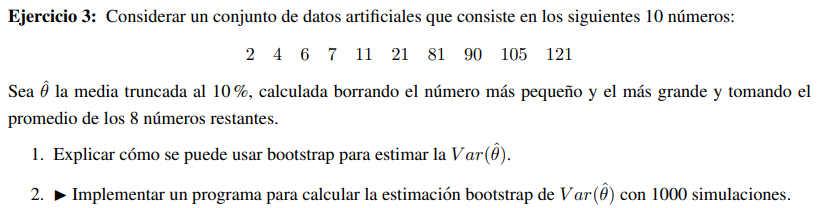

In [8]:
#@title b)
MUESTRA = [2, 4, 6, 7, 11, 21, 81, 90, 105, 121]

def estimador(muestra):
    muestra_truncada = sorted(muestra)[1:-1]
    media_muestral = sum(muestra_truncada) / len(muestra_truncada)
    return media_muestral

print(f"Param desconocido: {estimador(MUESTRA):.4f}")

Param desconocido: 40.6250


In [24]:
# @title Codigo
from random import choices


def generar_muestras_bootstrap(muestra_inicial, B=10_000):
    return [choices(muestra_inicial, k=len(muestra_inicial)) for _ in range(B)]


def var_muestral(muestra):
    media_muestral = sum(muestra) / len(muestra)
    return sum((x - media_muestral) ** 2 for x in muestra) / (len(muestra) - 1)


NUMERO_SIM = 1_000
s_cuad = estimador

muestra = [2, 4, 6, 7, 11, 21, 81, 90, 105, 121]
muestras_bootstrap = generar_muestras_bootstrap(muestra, NUMERO_SIM)

s_cuad_muestras_bootstrap = [s_cuad(m) for m in muestras_bootstrap]

var_s_cuad_muestras_bootstrap = var_muestral(s_cuad_muestras_bootstrap)

print(f"Var(s_quad) = {var_s_cuad_muestras_bootstrap:.4f}")

Var(s_quad) = 284.3053


# EJ 4

No vimos eso.